In [ ]:
library(Seurat)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(pheatmap)
library(ggpubr)
library(ggthemes)


In [ ]:
# Read in data 
seurat <- readRDS('seurat.rds')


In [4]:
# Subsetting seurat object based on basal media
Idents(seurat) <- seurat$Basal_media

NIM <- subset(seurat, idents = c("NIM"))
DualSi <- subset(seurat, idents = c("N2B27_2Si"))
SB_CHIR <- subset(seurat, idents = c("N2B27_SB_CHIR"))


In [5]:
# Setting AP and DV levels
# AP and DV_level1 for NIM and DualSi
AP_level1 <- c("XAV_3_FGF8", "XAV_3", "XAV_1", "ctrl", "CHIR_2_FGF8", "CHIR_2")
AP_color1 <- c("#d8527c", "#9a133d", "#f9b4c9", 'grey90', "#90719f", "#b695bc")

DV_level1 <- c("BMP4_3", "BMP4_1", "CycA", "ctrl", "SHH_2", "SHH_4")
DV_color1 <- c("#ffb242", '#ffe6b7', "#669d62", 'grey90', "#98C1F0", "#1D52A1")

# AP and DV level2 for SB_CHIR
AP_level2 <- c("ctrl", "FGF8_3", "RA_2", "RA_3", "RA_4", "RA_3_FGF8")
AP_color2 <- c('grey90', "mediumorchid3", "#72bcd5", "#528fad", "#376795", "#183E6B")

DV_level2 <- c("BMP4_3", "ctrl", "SHH_2", "SHH_4")
DV_color2 <- c("#ffb242", 'grey90', "#98C1F0", "#1D52A1")

# Setting the order of all region
region <- c('Forebrain', 'Midbrain', 'Hindbrain', 'Spinal cord',
           'SYM', 'ENS', 'TG', 'DRG',
           'Optic cup', 'NE', 'Other')

col_region <- c('#fe9b00', '#f4c40f', '#d8443c', '#9b3441',
               '#268a8a', '#226a99', '#383b81', '#92c051',
               '#633372', '#e87b89', '#cccccc')

#Setting the order of all neuron types
neuron_type <- c('GLUT','GABA','CHO','NOR','GLY','DOPA',
                'RGL','NBL','IP','NCC','EPL',
                'EC','MES','OB','EPC')

col_neuron <- c('#fe9b00','#f4c40f','#33A02C','#383b81','#d8443c','#9b3441',
   '#6a3d9a','#c9bba2','#aab5d5','#92c051','#000000',
   '#99610a','#cccccc','#1f6e9c','#B9CECB')

#Setting levels for SB_CHIR

id_region_SB_CHIR <- c(1,2,3,4,5,9,11)
region_level_SB_CHIR <- region[id_region_SB_CHIR]

id_neuron_type_SB_CHIR <- c(1,2,3,5,7,8,9,10,11,13,14)
neuron_type_level_SB_CHIR <- neuron_type[id_neuron_type_SB_CHIR]

#Setting levels for 2Si

id_region_2Si <- c(1,2,3,4,5,9,11)
region_level_2Si <- region[id_region_2Si]

id_neuron_type_2Si<- c(1,2,3,5,7,8,9,11,12,13)
neuron_type_level_2Si <- neuron_type[id_neuron_type_2Si]

#Setting levels for NIM

id_region_NIM <- c(1,2,3,4,5,9,11)
region_level_NIM <- region[id_region_NIM]

id_neuron_type_NIM <- c(1,2,3,5,7,8,9,10,11,12,13)
neuron_type_level_NIM <- neuron_type[id_neuron_type_NIM]


In [8]:
# For overall without subsetting based on basal media
# Setting the order of all region
region <- c('Forebrain', 'Midbrain', 'Hindbrain', 'Spinal cord',
           'SYM', 'ENS', 'TG', 'DRG',
           'Optic cup', 'NE', 'Other')

col_region <- c('#fe9b00', '#f4c40f', '#d8443c', '#9b3441',
               '#268a8a', '#226a99', '#383b81', '#92c051',
               '#633372', '#e87b89', '#cccccc')

# Setting the identity of all neuron types
neuron_type <- c('GLUT','GABA','CHO','NOR','GLY','DOPA',
                'RGL','NBL','IP','NCC','EPL',
                'EC','MES','OB','EPC')

# Setting the colors for all neuron types
col_neuron_type <- c('#fe9b00','#f4c40f','#33A02C','#383b81','#d8443c','#9b3441',
                    '#6a3d9a','#c9bba2','#aab5d5','#92c051','#000000',
                    '#99610a','#cccccc','#1f6e9c','#B9CECB')

# Setting up identity for region and neuron_type
id_region <- c(1,2,3,4,5,9,11)
id_neuron_type <- c(1,2,3,5,7,8,9,10,11,12,13,14)


In [9]:
# Getting prop table for regions
region_prp <- as.data.frame(prop.table(table(seurat$parse_id, seurat$region), margin=1))
names(region_prp) <- c('parse_id', 'region', 'Freq')

# Read in sample metadata
library(readxl)
sample_meta <- read_excel('/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Info/Parse_samples_all.xlsx')

# Filter the samples in plate 3
sample_meta <- sample_meta %>% filter(Sample %in% region_prp$parse_id)

# Adding AP and DV axis to region_prp
region_prp$AP_axis <- plyr::mapvalues(
    x= region_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$AP_label
)

region_prp$DV_axis <- plyr::mapvalues(
    x= region_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$DV_label
)

region_prp$Basal_media <- plyr::mapvalues(
    x= region_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$Basal_media
)

# Adjust the order of region
region_prp$region <- factor(region_prp$region, levels = region[id_region])  

head(region_prp)


,parse_id,region,Freq,AP_axis,DV_axis,Basal_media
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,p3_A1,Forebrain,0.1317690,XAV_3,BMP4_3,NIM
2,p3_A10,Forebrain,0.8325255,XAV_3_FGF8,CycA,NIM
3,p3_A11,Forebrain,0.8375693,XAV_1,CycA,NIM
4,p3_A12,Forebrain,0.1860752,ctrl,CycA,NIM
5,p3_A2,Forebrain,0.1154229,XAV_3_FGF8,BMP4_3,NIM
6,p3_A3,Forebrain,0.3226244,XAV_1,BMP4_3,NIM


In [10]:
region_prp_1 <- region_prp %>% filter(!Basal_media %in% 'N2B27_SB_CHIR')
region_prp_1$AP_axis <- factor(region_prp_1$AP_axis, levels = AP_level1) 
region_prp_1$DV_axis <- factor(region_prp_1$DV_axis, levels = DV_level1) 

region_prp_2 <- region_prp %>% filter(Basal_media %in% 'N2B27_SB_CHIR')
region_prp_2$AP_axis <- factor(region_prp_2$AP_axis, levels = AP_level2) 
region_prp_2$DV_axis <- factor(region_prp_2$DV_axis, levels = DV_level2) 


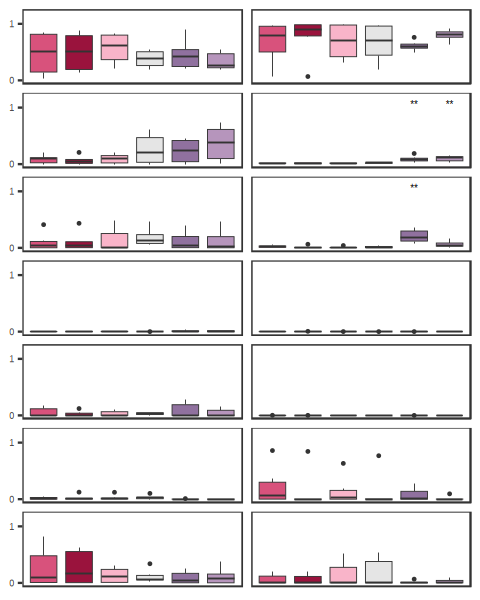

In [11]:
options(repr.plot.width=4, repr.plot.height=5)
p1 <- ggplot(region_prp_1, aes(x = AP_axis, y = Freq, fill=AP_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = AP_color1) +
    ggpubr::rotate_x_text() +
    facet_grid(region ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_text(size = 5)) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(region_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p1

# Save the plot to a file 
#dir <- '/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/Boxplot/iGlut_pre_composition/region1_AP_new.pdf'
#ggsave(dir, width = 6, height = 8, dpi = 300, units = "cm")


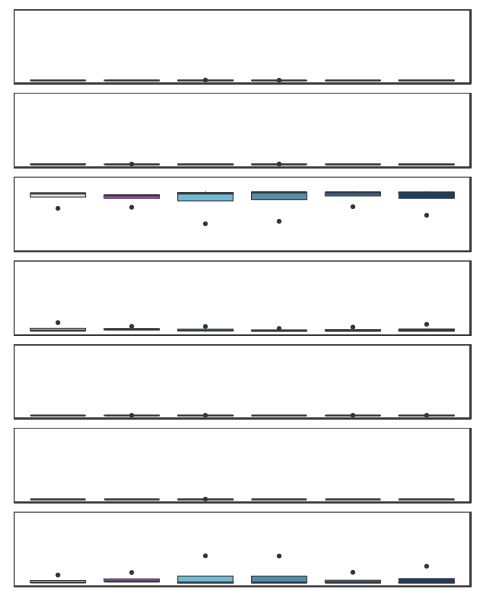

In [23]:
options(repr.plot.width=4, repr.plot.height=5)
p2 <- ggplot(region_prp_2, aes(x = AP_axis, y = Freq, fill=AP_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = AP_color2) +
    ggpubr::rotate_x_text() +
    facet_grid(region ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y=element_blank()) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(region_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p2

# Save the plot to a file 
#dir <- '/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/Boxplot/iGlut_pre_composition/region1_AP_new.pdf'
#ggsave(dir, width = 6, height = 8, dpi = 300, units = "cm")


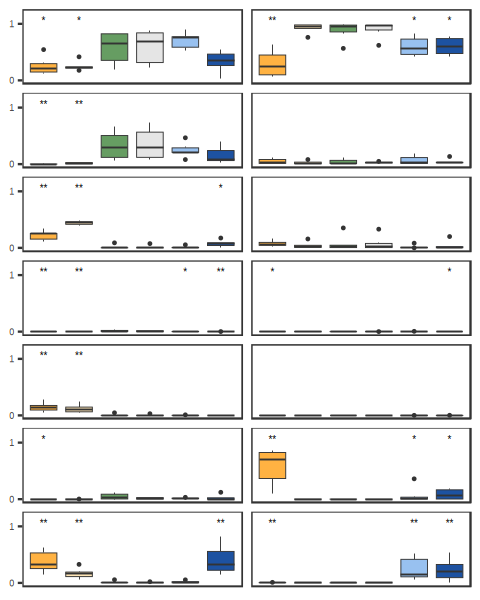

In [14]:
options(repr.plot.width=4, repr.plot.height=5)
p3 <- ggplot(region_prp_1, aes(x = DV_axis, y = Freq, fill=DV_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = DV_color1) +
    ggpubr::rotate_x_text() +
    facet_grid(region ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_text(size = 5)) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(region_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p3


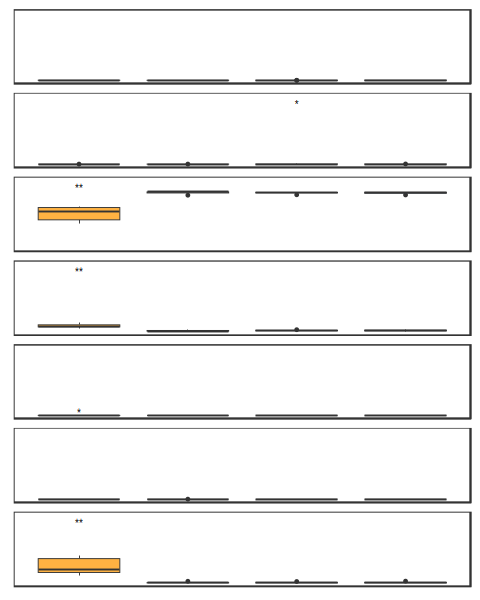

In [15]:
options(repr.plot.width=4, repr.plot.height=5)
p4 <- ggplot(region_prp_2, aes(x = DV_axis, y = Freq, fill=DV_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = DV_color2) +
    ggpubr::rotate_x_text() +
    facet_grid(region ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y=element_blank()) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(region_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p4


In [16]:
# Getting prop table for regions
nt_prp <- as.data.frame(prop.table(table(seurat$parse_id, seurat$neuron_type), margin=1))
names(nt_prp) <- c('parse_id', 'neuron_type', 'Freq')

# Read in sample metadata
library(readxl)
sample_meta <- read_excel('/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Info/Parse_samples_all.xlsx')

# Filter the samples in plate 3
sample_meta <- sample_meta %>% filter(Sample %in% nt_prp$parse_id)

# Adding AP and DV axis to region_prp
nt_prp$AP_axis <- plyr::mapvalues(
    x= nt_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$AP_label
)

nt_prp$DV_axis <- plyr::mapvalues(
    x= nt_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$DV_label
)

nt_prp$Basal_media <- plyr::mapvalues(
    x= nt_prp$parse_id,
    from = sample_meta$Sample,
    to = sample_meta$Basal_media
)

# Adjust the order of region
nt_prp$neuron_type <- factor(nt_prp$neuron_type, levels = neuron_type[id_neuron_type])  

head(nt_prp)


,parse_id,neuron_type,Freq,AP_axis,DV_axis,Basal_media
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,p3_A1,CHO,0.00000000,XAV_3,BMP4_3,NIM
2,p3_A10,CHO,0.02039111,XAV_3_FGF8,CycA,NIM
3,p3_A11,CHO,0.03267724,XAV_1,CycA,NIM
4,p3_A12,CHO,0.04313001,ctrl,CycA,NIM
5,p3_A2,CHO,0.00000000,XAV_3_FGF8,BMP4_3,NIM
6,p3_A3,CHO,0.00000000,XAV_1,BMP4_3,NIM


In [17]:
nt_prp_1 <- nt_prp %>% filter(!Basal_media %in% 'N2B27_SB_CHIR')
nt_prp_1$AP_axis <- factor(nt_prp_1$AP_axis, levels = AP_level1) 
nt_prp_1$DV_axis <- factor(nt_prp_1$DV_axis, levels = DV_level1) 

nt_prp_2 <- nt_prp %>% filter(Basal_media %in% 'N2B27_SB_CHIR')
nt_prp_2$AP_axis <- factor(nt_prp_2$AP_axis, levels = AP_level2) 
nt_prp_2$DV_axis <- factor(nt_prp_2$DV_axis, levels = DV_level2) 


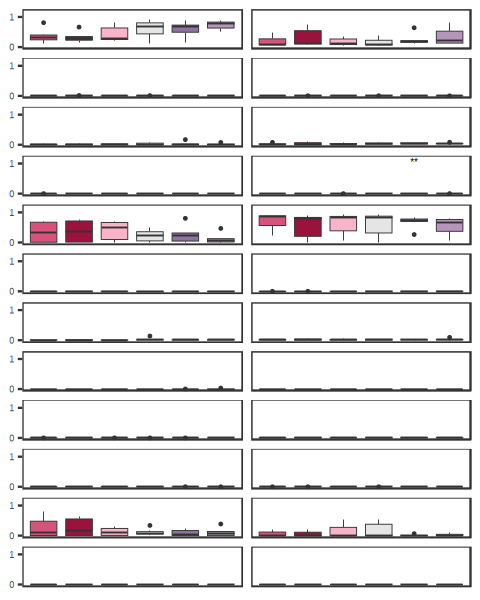

In [20]:
options(repr.plot.width=4, repr.plot.height=5)
p5 <- ggplot(nt_prp_1, aes(x = AP_axis, y = Freq, fill=AP_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = AP_color1) +
    ggpubr::rotate_x_text() +
    facet_grid(neuron_type ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_text(size = 5)) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(nt_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p5


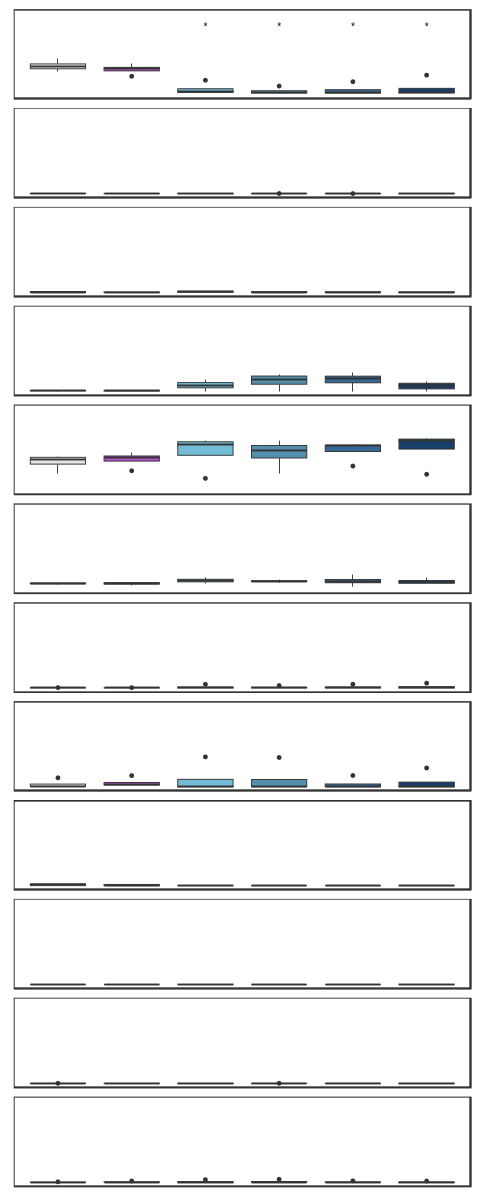

In [22]:
options(repr.plot.width=4, repr.plot.height=10)
p6 <- ggplot(nt_prp_2, aes(x = AP_axis, y = Freq, fill=AP_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = AP_color2) +
    ggpubr::rotate_x_text() +
    facet_grid(neuron_type ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y=element_blank()) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(nt_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p6

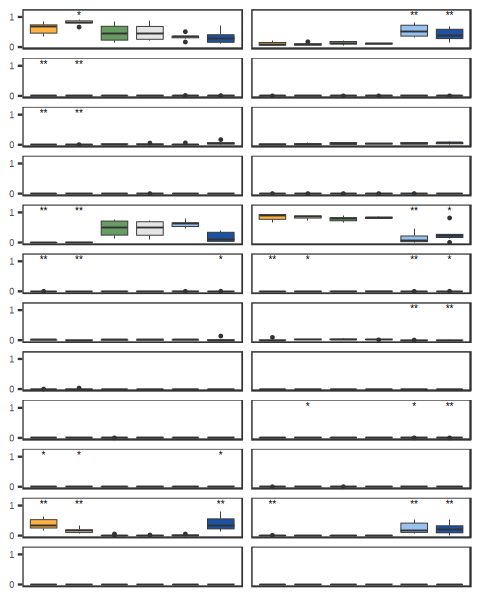

In [25]:
options(repr.plot.width=4, repr.plot.height=5)
p7 <- ggplot(nt_prp_1, aes(x = DV_axis, y = Freq, fill=DV_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = DV_color1) +
    ggpubr::rotate_x_text() +
    facet_grid(neuron_type ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_text(size = 5)) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(nt_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p7


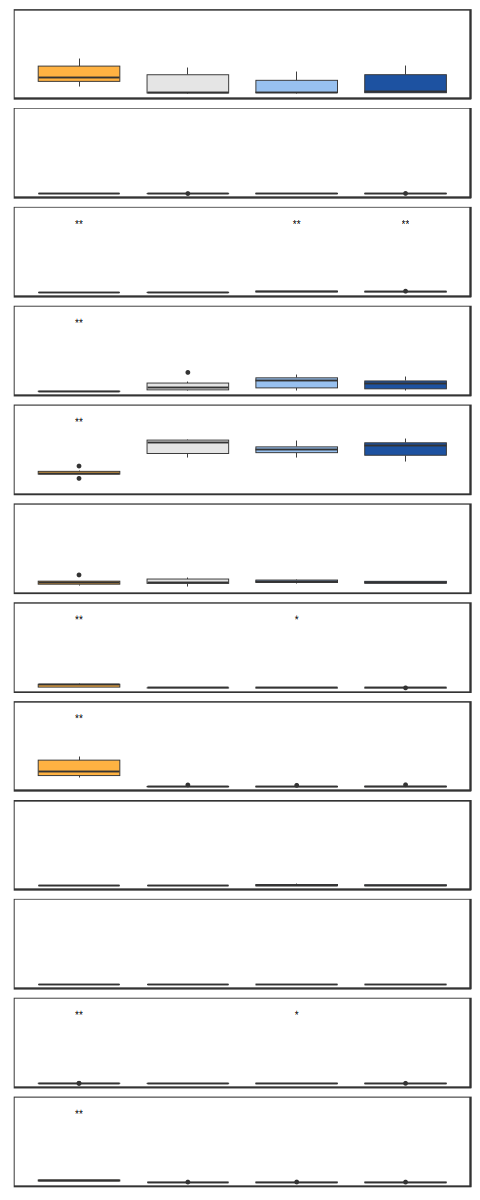

In [26]:
options(repr.plot.width=4, repr.plot.height=10)
p8 <- ggplot(nt_prp_2, aes(x = DV_axis, y = Freq, fill=DV_axis)) +
    geom_boxplot(linewidth = 0.2, outlier.size = 0.3) +
    theme_bw() +
    scale_fill_manual(values = DV_color2) +
    ggpubr::rotate_x_text() +
    facet_grid(neuron_type ~ Basal_media) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        strip.text.y = element_blank(),
        strip.text.x = element_blank(),
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y=element_blank()) +
    theme(legend.position="none") +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "ctrl", label.y = max(nt_prp$Freq)*1.02, hide.ns = TRUE, size = 2) +
    scale_y_continuous(breaks = c(0, 1), labels = c("0", "1"), limits = c(0, 1.2))

p8

In [28]:
library(patchwork)

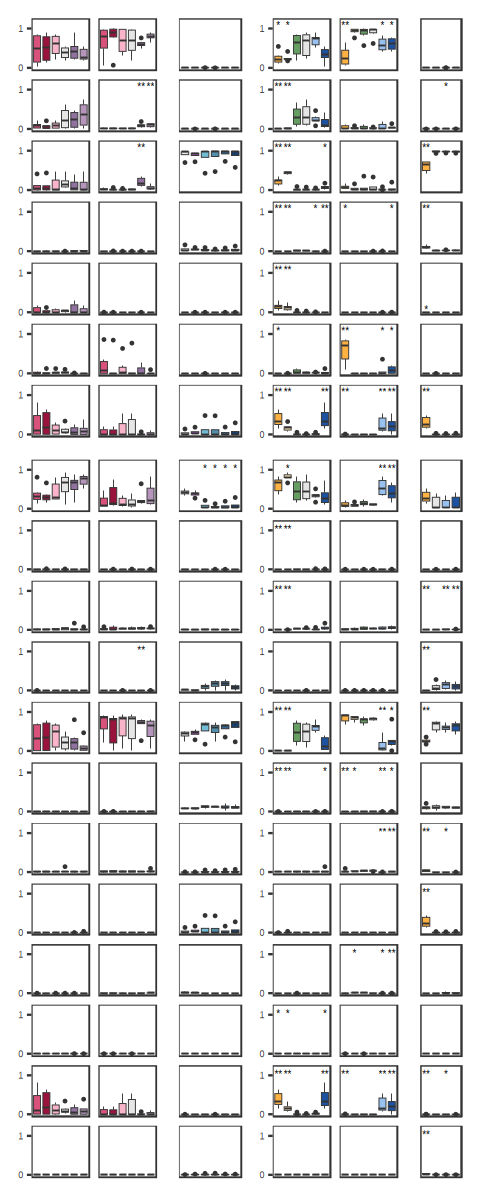

In [37]:
x1 <- (p1 | p2 | p3 | p4) + plot_layout(widths = c(6, 3, 6, 2))
x2 <- (p5 | p6 | p7 | p8) + plot_layout(widths = c(6, 3, 6, 2))

# Combine x1 and x2 horizontally with the up/down ratio of 7/12
final_plot <- (x1 / x2) + plot_layout(heights = c(7, 12))

# Display the final plot
final_plot


In [ ]:
# Save the plot to a file 
dir <- 'all_stat.pdf'
ggsave(dir, width = 24, height = 24, dpi = 300, units = "cm")
